In [1]:
import pandas as pd

df = pd.read_csv("housing_brez_nan.csv", index_col=0, sep=",", decimal=".")
df.head()

,Type,Rooms,Bathroom,CarSpots,Landsize,BuildingArea,YearBuilt,Price,SellerG,Suburb,DistanceFromCenter,Lattitude,Longtitude,Regionname
1 Abercrombie St,house,4.0,2.000000,2.000000,596.000000,161.000000,1980.000000,1.046312e+06,Nelson,Oakleigh South,14.7,-37.932000,145.082700,South-Eastern Metropolitan
1 Aberfeldie Wy,house,5.0,3.000000,2.000000,588.584711,217.000000,2005.000000,6.800000e+05,Barry,Caroline Springs,14.8,-37.727050,144.748560,Western Metropolitan
1 Acheron Av,house,3.0,1.608363,1.701148,588.584711,158.274673,1965.475409,8.900000e+05,hockingstuart,Reservoir,12.0,-37.811555,145.001695,Northern Metropolitan
1 Adelle Ct,house,3.0,2.000000,2.000000,820.000000,158.274673,1965.475409,1.700000e+06,Barry,Doncaster,13.9,-37.780300,145.124800,Eastern Metropolitan
1 Aintree Rd,house,4.0,3.000000,4.000000,349.000000,158.274673,1965.475409,1.046312e+06,Nelson,Glen Iris,9.2,-37.858000,145.043300,Southern Metropolitan


In [3]:
df.isnull().sum()

Type                  0
Rooms                 0
Bathroom              0
CarSpots              0
Landsize              0
BuildingArea          0
YearBuilt             0
Price                 0
SellerG               0
Suburb                0
DistanceFromCenter    0
Lattitude             0
Longtitude            0
Regionname            0
dtype: int64

In [5]:
df.dtypes

Type                   object
Rooms                 float64
Bathroom              float64
CarSpots              float64
Landsize              float64
BuildingArea          float64
YearBuilt             float64
Price                 float64
SellerG                object
Suburb                 object
DistanceFromCenter    float64
Lattitude             float64
Longtitude            float64
Regionname             object
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy(deep=True)
kat = ["SellerG", "Suburb", "Regionname"]
for k in kat:
    df_copy[k] = LabelEncoder().fit_transform(df_copy[k]) # kategoričnim podatkom dajo stevilske vrednosti
    
df_copy.head()

,Type,Rooms,Bathroom,CarSpots,Landsize,BuildingArea,YearBuilt,Price,SellerG,Suburb,DistanceFromCenter,Lattitude,Longtitude,Regionname
1 Abercrombie St,house,4.0,2.000000,2.000000,596.000000,161.000000,1980.000000,1.046312e+06,200,246,14.7,-37.932000,145.082700,4
1 Aberfeldie Wy,house,5.0,3.000000,2.000000,588.584711,217.000000,2005.000000,6.800000e+05,22,68,14.8,-37.727050,144.748560,6
1 Acheron Av,house,3.0,1.608363,1.701148,588.584711,158.274673,1965.475409,8.900000e+05,323,263,12.0,-37.811555,145.001695,2
1 Adelle Ct,house,3.0,2.000000,2.000000,820.000000,158.274673,1965.475409,1.700000e+06,22,112,13.9,-37.780300,145.124800,0
1 Aintree Rd,house,4.0,3.000000,4.000000,349.000000,158.274673,1965.475409,1.046312e+06,200,150,9.2,-37.858000,145.043300,5


In [9]:
df_paste = pd.get_dummies(df, columns=kat)  # Kategoricne podatke spremeni v stoplce, ki so 0 ali 1
df_paste.shape

(30718, 702)

In [11]:
df_paste.head()

,Type,Rooms,Bathroom,CarSpots,Landsize,BuildingArea,YearBuilt,Price,DistanceFromCenter,Lattitude,...,Suburb_croydon,Suburb_viewbank,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1 Abercrombie St,house,4.0,2.000000,2.000000,596.000000,161.000000,1980.000000,1.046312e+06,14.7,-37.932000,...,False,False,False,False,False,False,True,False,False,False
1 Aberfeldie Wy,house,5.0,3.000000,2.000000,588.584711,217.000000,2005.000000,6.800000e+05,14.8,-37.727050,...,False,False,False,False,False,False,False,False,True,False
1 Acheron Av,house,3.0,1.608363,1.701148,588.584711,158.274673,1965.475409,8.900000e+05,12.0,-37.811555,...,False,False,False,False,True,False,False,False,False,False
1 Adelle Ct,house,3.0,2.000000,2.000000,820.000000,158.274673,1965.475409,1.700000e+06,13.9,-37.780300,...,False,False,True,False,False,False,False,False,False,False
1 Aintree Rd,house,4.0,3.000000,4.000000,349.000000,158.274673,1965.475409,1.046312e+06,9.2,-37.858000,...,False,False,False,False,False,False,False,True,False,False


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

izhod = "Type"

df_izhod = df_copy[izhod]
df_vhod = df_copy.drop(izhod, axis=1)

kfold = StratifiedKFold(n_splits=5)
rez = cross_val_score(KNeighborsClassifier(n_neighbors=5), df_vhod, df_izhod, cv=kfold, scoring="accuracy")

print(rez.mean())   # Povprečje, drugače bi jih izpisalo pet (n_splits=5)

0.7365397161911932


In [13]:
df_izhod = df_paste[izhod]
df_vhod = df_paste.drop(izhod, axis=1)

kfold = StratifiedKFold(n_splits=5)
rez = cross_val_score(KNeighborsClassifier(n_neighbors=5), df_vhod, df_izhod, cv=kfold, scoring="accuracy")

print(rez.mean()) 

0.7551609386022029


C:\Users\vzupanic\AppData\Local\Temp\ipykernel_13876\3794070308.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Price) # Vidi se slaba porazdelitev


<Axes: xlabel='Price', ylabel='Density'>

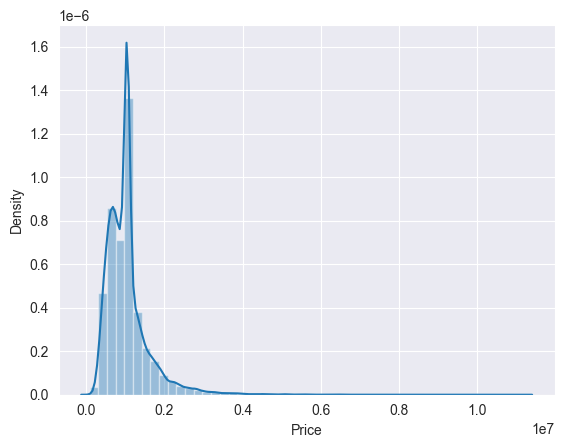

In [17]:
ste = df.select_dtypes(exclude=["object"]).columns

import seaborn as sns

sns.distplot(df.Price) # Vidi se slaba porazdelitev

In [18]:
from sklearn.preprocessing import StandardScaler

df_paste[ste] = StandardScaler().fit_transform(df_paste[ste])
df_paste.head()

,Type,Rooms,Bathroom,CarSpots,Landsize,BuildingArea,YearBuilt,Price,DistanceFromCenter,Lattitude,...,Suburb_croydon,Suburb_viewbank,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1 Abercrombie St,house,1.012406,0.620026,3.427628e-01,0.002568,1.026643e-02,5.783189e-01,-2.045003e-16,0.539268,-1.540556,...,False,False,False,False,False,False,True,False,False,False
1 Aberfeldie Wy,house,2.040577,2.203190,3.427628e-01,0.000000,2.212209e-01,1.573732e+00,-6.434801e-01,0.554158,1.080872,...,False,False,False,False,False,False,False,False,True,False
1 Acheron Av,house,-0.015765,0.000000,-2.546699e-16,0.000000,1.070658e-16,1.810646e-14,-2.745847e-01,0.137263,0.000000,...,False,False,False,False,True,False,False,False,False,False
1 Adelle Ct,house,-0.015765,0.620026,3.427628e-01,0.080154,1.070658e-16,1.810646e-14,1.148297e+00,0.420156,0.399774,...,False,False,True,False,False,False,False,False,False,False
1 Aintree Rd,house,1.012406,2.203190,2.636625e+00,-0.082984,1.070658e-16,1.810646e-14,-2.045003e-16,-0.279632,-0.594054,...,False,False,False,False,False,False,False,True,False,False


In [20]:
df_izhod = df_paste[izhod]
df_vhod = df_paste.drop(izhod, axis=1)

kfold = StratifiedKFold(n_splits=5)
rez = cross_val_score(KNeighborsClassifier(n_neighbors=5), df_vhod, df_izhod, cv=kfold, scoring="accuracy")
print(rez.mean())

0.8184138757613679


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_neighbors": [1, 3],
    "algorithm": ["ball_tree", "kd_tree"]
}

grid_k = GridSearchCV(KNeighborsClassifier(), params, cv=10, scoring="accuracy")
grid_k.fit(df_vhod, df_izhod)
print(grid_k.best_params_)
print(grid_k.best_score_)
print(grid_k.best_estimator_)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params = {
    "n_neighbors": randint(1, 10),
    "algorithm": ["ball_tree", "kd_tree"]
}

rand = RandomizedSearchCV(KNeighborsClassifier(), params, cv=10, n_iter=10 ,scoring="accuracy")
rand.fit(df_vhod, df_izhod)
print(rand.best_params_)
print(rand.best_score_)
print(rand.best_estimator_)